In [97]:
import pickle
import geopandas
from amp import Node, RelationDesc, WayDesc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def pickle_load(path):
    with open(path, "rb") as f:
        return pickle.load(f)

In [6]:
nodes = pickle_load(".cache/nodes5d63fd0c24bb3d347008a06abdefeb771b9c7a888d82edba7c9da9922ecd52e3.pickle")
relations = pickle_load(".cache/relations5dcf3c21ea64df0d8b444e6b3c2628c44a93bd319381d1b58d18515b888b251d.pickle")
ways = pickle_load(".cache/ways9aa15215f1a5ca901da86a27f296f35cc5a84d6ec40dbdd5a2e150574a528cfa.pickle")

In [8]:
relations[28934]

RelationDesc(id_=28934, way_refs=[367645110, 257000713, 909497293, 909497294, 908315776, 908315775, 908315779, 908315780, 908315774, 908315744, 908315753, 908315743, 908301691, 506126868, 907333462, 506124335, 672045265, 672045264, 506124333, 1040957288, 1040957290, 797015374, 535163550, 369911505, 369912047, 204068876, 333226157, 431275464, 369912040, 672068853, 672068856, 166709480, 166709479, 369912041, 369912043, 369912046, 369912045, 369912042, 369912044, 369911506, 369911507, 505408911, 3322449, 505392462, 505413174, 224302536, 505403224, 505403208, 505403207, 505403213, 506040741, 506121322, 506124332, 506124331, 857610586, 857610587, 857610588, 857610589, 857860927, 857860928], node_refs=[])

In [28]:
def way_to_wkt(way, nodes):
    point_strs = []
    for node_ref in way.node_refs:
        node = nodes[node_ref]
        point_strs.append(f"{node.lon} {node.lat}")
    return f"LINESTRING ({', '.join(point_strs)})"

In [29]:
way_wkts = list(map(lambda w: way_to_wkt(w, nodes), ways.values()))

In [30]:
gdf = geopandas.GeoSeries.from_wkt(way_wkts)

<Axes: >

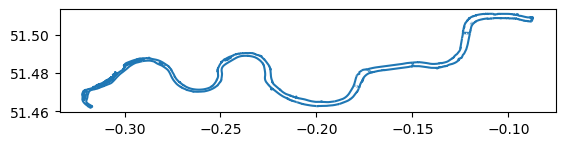

In [31]:
gdf.plot()

In [63]:
def way_to_coords(way):
    return [
        (nodes[ref].lon, nodes[ref].lat)
        for ref in way.node_refs
    ]

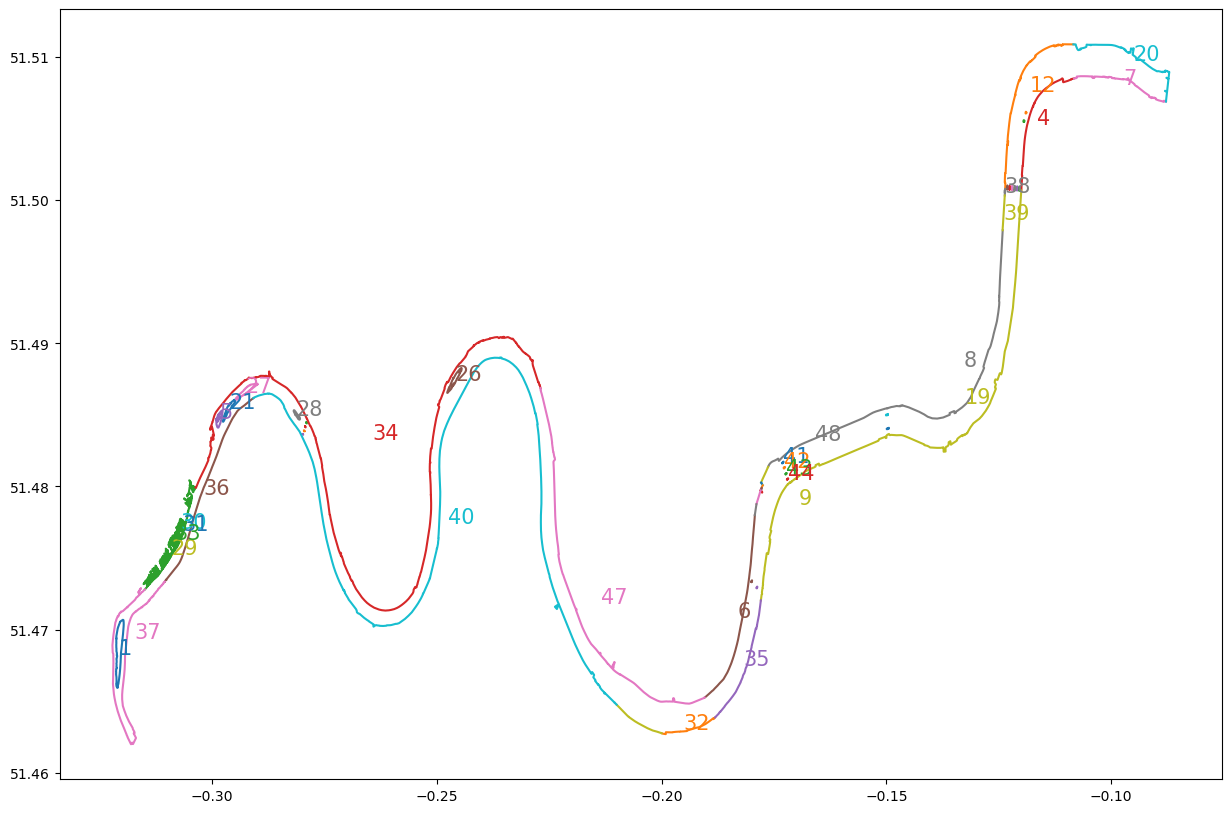

In [118]:
cycler = plt.rcParams['axes.prop_cycle']()
for (way_idx, way), plot_kwargs in zip(enumerate(ways.values()), cycler):
    coords = way_to_coords(way)
    coords_t = list(zip(*coords))
    plt.plot(*list(zip(*coords)), **plot_kwargs)

    if len(way.node_refs) >= 15:
        plt.text(np.mean(coords_t[0]), np.mean(coords_t[1]), f"{way_idx + 1}", {"size": 15}, **plot_kwargs)
    coord_pairs = list(zip(coords, coords[1:]))
    for i in range(10, len(coord_pairs), 50):
        ((start_lon, start_lat), (end_lon, end_lat)) = coord_pairs[i]
        #plt.arrow(start_lon, start_lat, end_lon - start_lon, end_lat - start_lat, width=0.0007, overhang=1, **plot_kwargs)
    #if way_idx > 5:
    #    break
#plt.xlim(-0.15, -0.05)
#plt.ylim(51.49, 51.52)
#plt.legend()
plt.gcf().set_size_inches(15, 10)
plt.savefig("river_elements.png")

In [117]:
plt.savefig("river_elements.png")

<Figure size 640x480 with 0 Axes>

In [58]:
for way in ways.values():
    w = 0.00005
    for i, (start, end) in enumerate(zip(way.node_refs, way.node_refs[1:])):
        start = nodes[start]
        end = nodes[end]
        if (start.lon, start.lat) == (end.lon, end.lat):
            continue
        plt.axline((start.lon, start.lat), (end.lon, end.lat))
        if i % 10 == 0:
            plt.arrow(
                start.lon, start.lat, end.lon - start.lon, end.lat - start.lat,
                shape="left",
                #linewidth=0.1,
                length_includes_head=True,
                width=w,
                head_width=3 * w,
                head_length=4.5 * w,
            )
    break

Error in callback <function _draw_all_if_interactive at 0x7eac9d43a840> (for post_execute), with arguments args (),kwargs {}:


ValueError: Cannot draw a line through two identical points (x=(np.float64(-0.3195974), np.float64(-0.3195972)), y=(np.float64(51.4704414), np.float64(51.4705052)))

ValueError: Cannot draw a line through two identical points (x=(np.float64(-0.3195974), np.float64(-0.3195972)), y=(np.float64(51.4704414), np.float64(51.4705052)))

<Figure size 640x480 with 1 Axes>